## Project 6 : Clustering
- Name: Lexus Carton
- Date: november 9th 2023

## Instructions

### Description

Practice clustering on a using the well known and very popular `Iris` Dataset! The Iris flower data set is fun for learning supervised classification algorithms, and is known as a difficult case for unsupervised learning. 
https://cran.r-project.org/web/packages/dendextend/vignettes/Cluster_Analysis.html
<br><br>Yes, there are many examples out there, but see if you can do it yourself :). We can easily hypothesize on how many clusters would yield the best result, so let us prove it through a simple experiment that you could repeat with additional data sets.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.

### Setup

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import sklearn as sk
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

### Problem 1: Data Generation (5 points)
Reference for more information: Chapter 5.11 K-Means in the online course book.

1. Load the `iris` dataset and separate into `X` and `y` variables (our ground truth labels will just be used for visualization).
2. Write a hypothesis on how many clusters will yield the best labeling.

In [11]:
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
#print(X)
y = iris.target
print(y)


#iris.head()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Hypothesis**(Edit this cell)
>I think there will be around 5 clusters 
>

### Problem 2: Data exploration (10 points)

This is the step where you would normally conduct any needed preprocessing, data wrangling, and investigation of the data.
<br>**Note:** `print(iris.DESCR)` prints the iris dataset description, provided you loaded it into a variable named `iris`

a. Using your skills from previous projects, provide code below to produce answers to the following questions (edit this cell with your answers): 

    1. How many features are provided?
    ther are 4 features provided they correspand with the sepal length and width and petal length and width. 

    2. How many total observations?
    150

    3. How many different labels are included, what are they called, and is it a balanced dataset with the same number of observations for each class?
    There are three labels. 150 instances, or rows, and they are divided into 3rds. 50are setosa, 50 are versicolor and 50 are virginica. 
        
b. Create a 2D or 3D scatter plot of two or three of the features and use the y labels for color coding. Do not reduce the data or number of features in any way (you will do this by applying PCA in problem 5).

c. Since clusters can be influenced by the magnitudes of the variables, scale the feature data and plot a histogram of the transformed feature data (think about if you should use the min-max, standard scaler, or normalizer).

In [18]:
# a
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

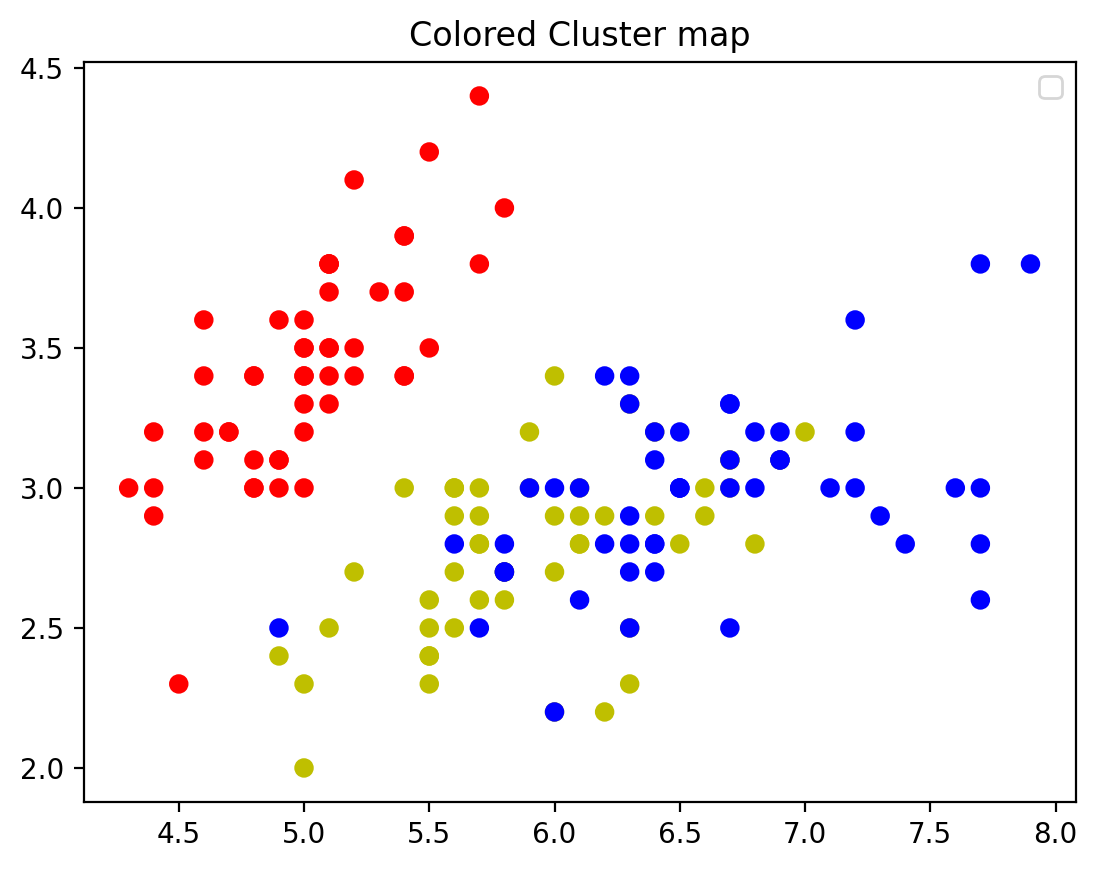

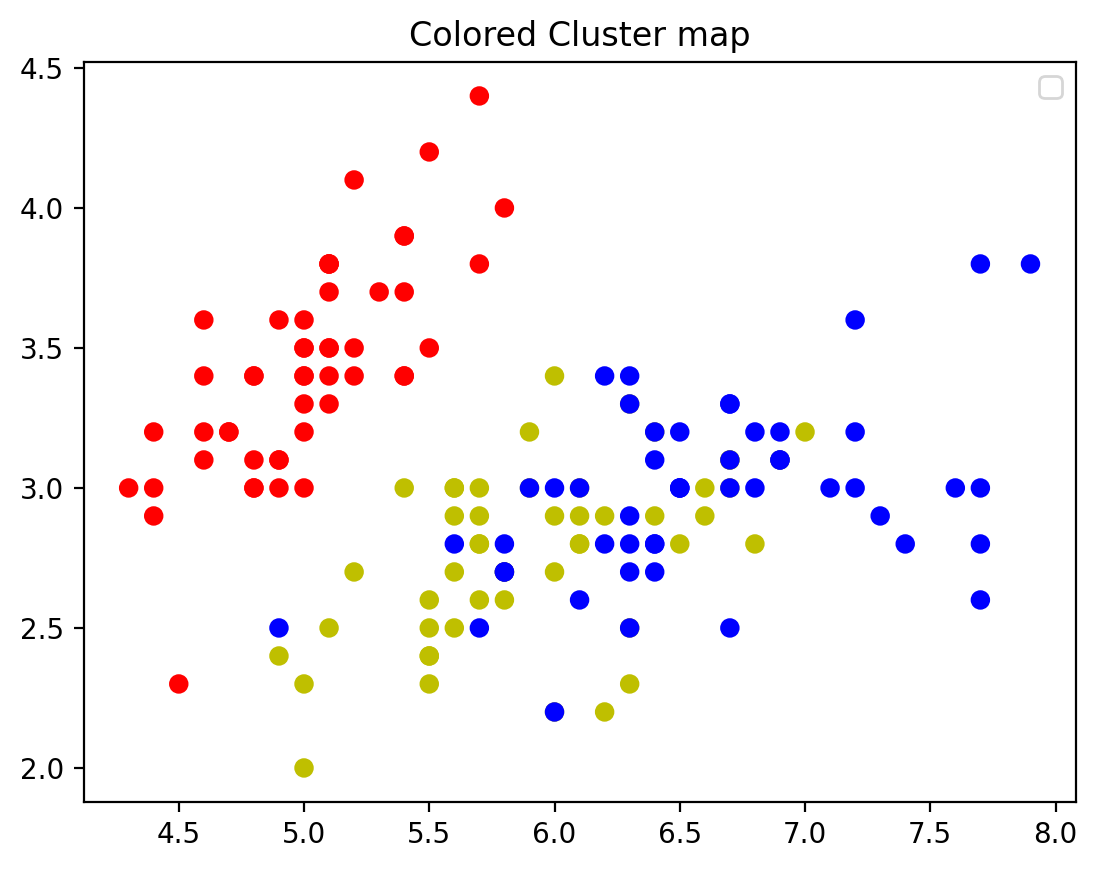

In [13]:
# b
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#(you will do this by applying PCA in problem 5).
from matplotlib.colors import ListedColormap
plt.legend(['Iris-Setosa','Iris-Versicolor','Iris-Virginica' ])
cmap = ListedColormap(['r', 'y', 'b'])

plt.title("Colored Cluster map")
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
#plt.figure(figsize=[20,5])

plt.show()


#for i in range(3):
 #   plt.subplot(1,3,i+1)
  #  plt.scatter(data[:,0], data[:,1], c=C[i], cmap=cmap)


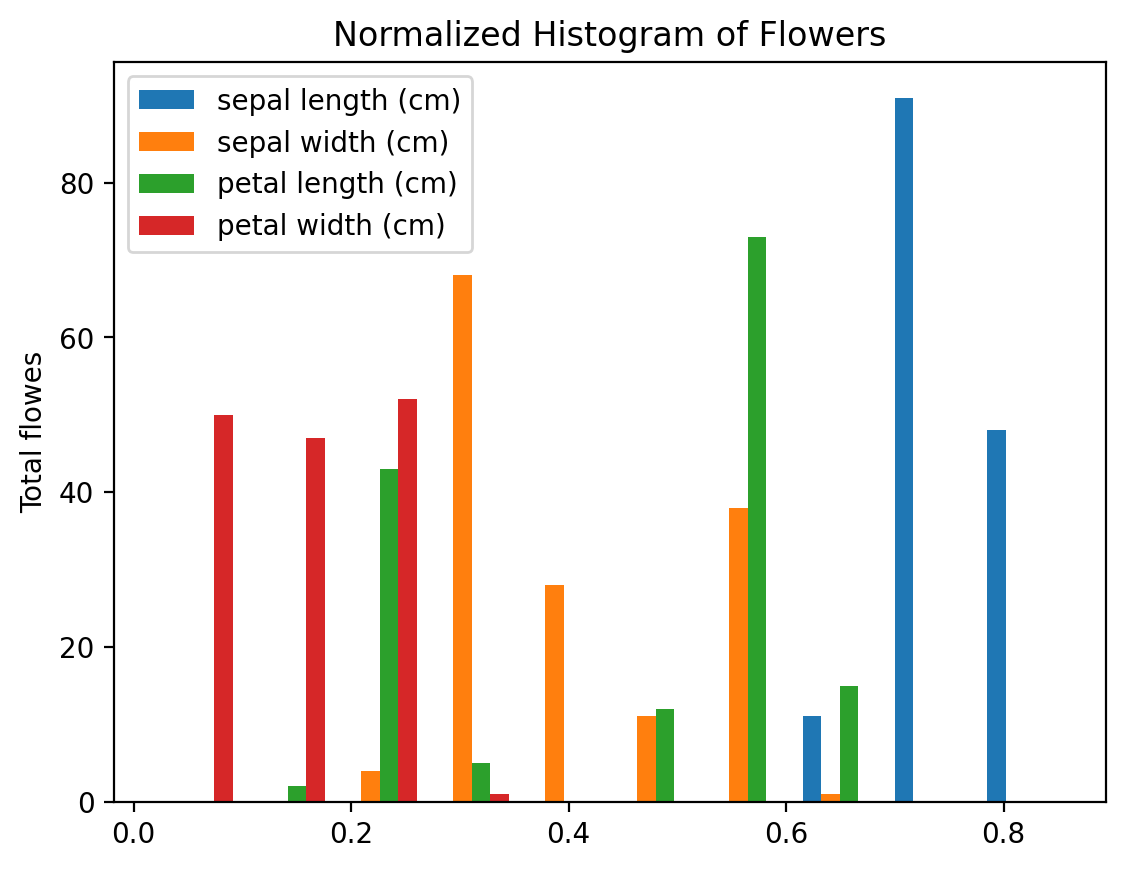

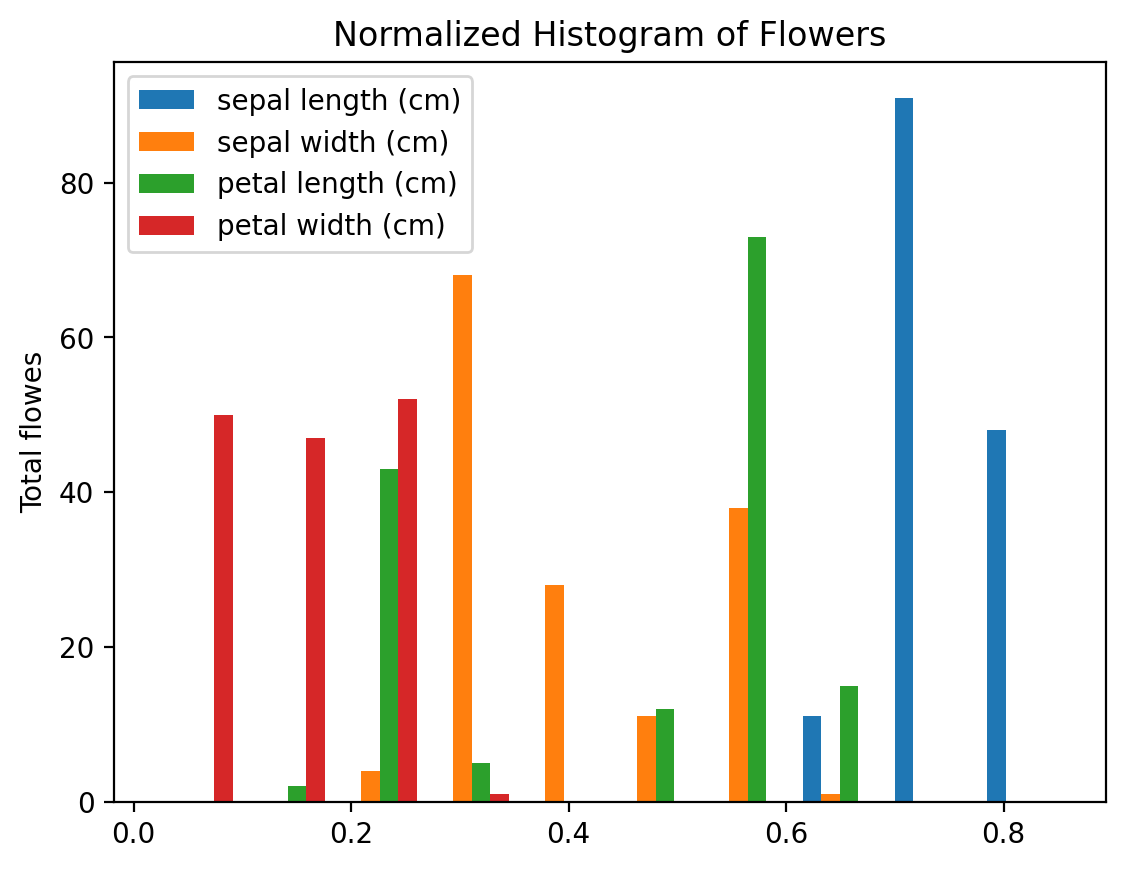

In [14]:
#c. Scale the data (think about if you should use the min-max, standard scaler, or normalizer)

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

# Calculate the normalization paratmeters
normalized = Normalizer()
#X_norm = StandardScaler()   # for scaler 

normalized.fit(X)
#X_norm.fit(X)  # uses standard scaler 

# Apply the normalization to our original data

X_norm = normalized.transform(X)

#X_norm = X_norm.transform(X)    #uses scaler

# print(X_norm)
#X_norm.shape
plt.hist(X_norm)
#plt.xlabel() 
#plt.ylabel()

#sepal length in cm  sepal width in cm, petal length in cm petal width in cm
plt.legend(['sepal length (cm)' ,'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

plt.ylabel('Total flowes')
plt.title("Normalized Histogram of Flowers")


#Create a 2D or 3D scatter plot of two or three of the 
#features and use the y labels for color coding. 

plt.show()





 # Calculate the scaling paratmeters



# Perform the scaling


### Problem 3: Unsupervised Learning - Clustering (15 points)
Conduct clustering experiments with one of algorithms discussed in class (e.g., k-means) for number of clusters k = 2-10. Create another 2D or 3D scatter plot utilizing the <b>cluster assignments</b> for color coding (this output can be a plot for each of the values of k or just one final plot using the value of k from your best Silhouette result obtained in Problem 4 below).  

#### Steps:
Repeat for each value of k (maybe a loop here would be appropriate):
1. Create model object
2. Train or fit the model
3. Predict cluster assignments
4. Calculate Silhouette width (see Problem 4)
4. Plot points color coded by class labels predicted by the model.

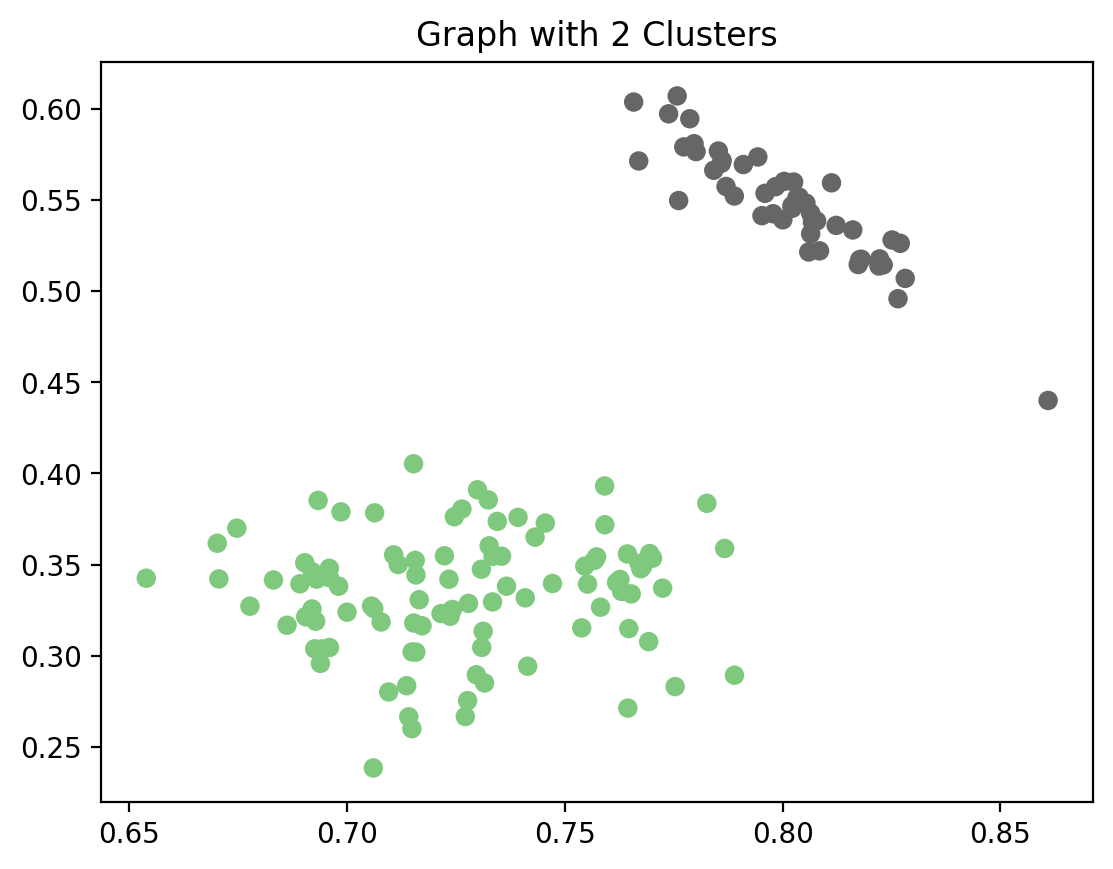

 The Silhouette score is, 0.8192435078941299


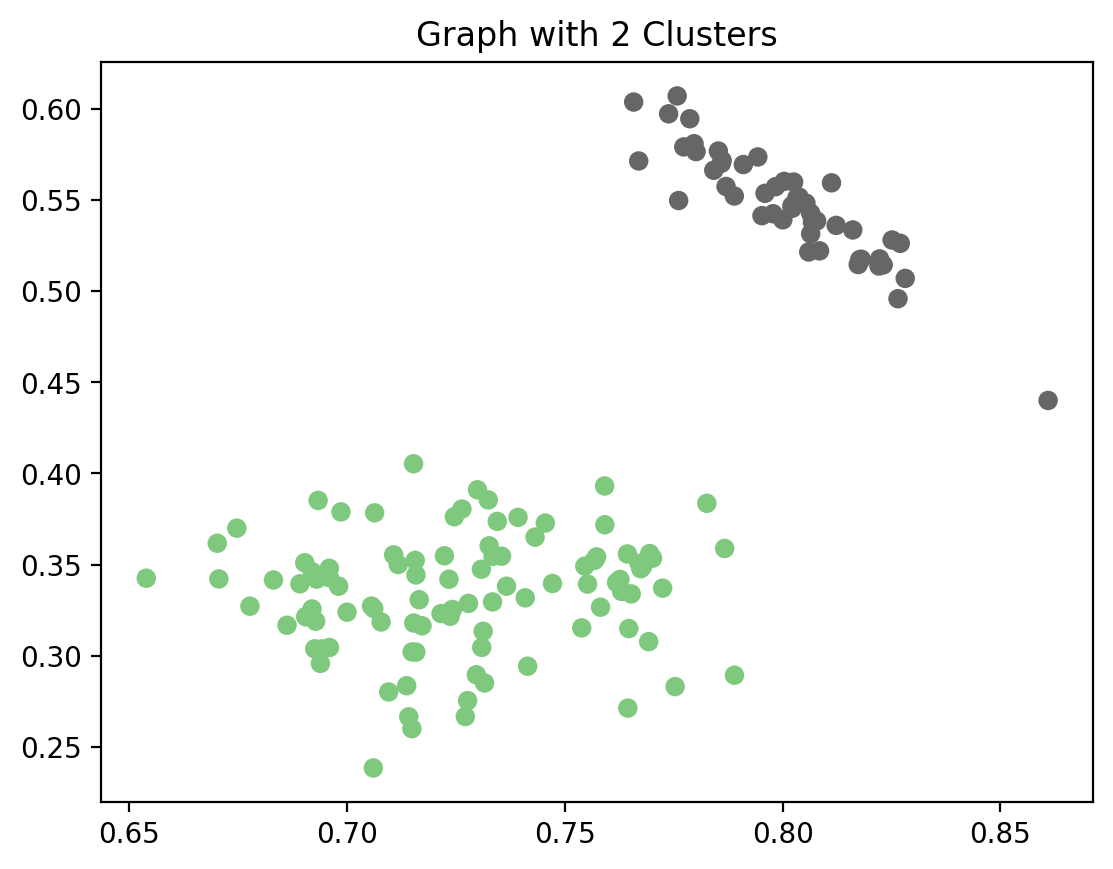

 The Silhouette score is, 0.8192435078941299


In [15]:
from sklearn.metrics import silhouette_score

BestScore=0
cluster=1
NumberClusters=0
for K in range (2,10):
#Create model object
    km_classifer=KMeans(n_clusters=K)
#Train or fit the model
    
    
    km_classifer.fit(X_norm)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #km_classifer.fit(X_train,y_train)
#Predict cluster assignments
    y_pred=km_classifer.predict(X_norm)
   
    #Calculate Silhouette width (see Problem 4)
    SilWidth=silhouette_score(X_norm,y_pred)
    if(SilWidth>BestScore):
        BestScore = SilWidth
        cluster= K 
        plt.scatter(X_norm[:,0], X_norm[:,1], c=y_pred, cmap=plt.cm.get_cmap('Accent'))
 
    #print("The nunber of clusters is ",K, "and")
   # plt.title('Graph with %K'% K)
    
plt.title("Graph with %i" % cluster +" Clusters") 
              
  
    #plt.xlabel(better)

    
plt.show()
print(" The Silhouette score is,",BestScore)
    #Plot points color coded by class labels predicted by the model.




### Problem 4: Evaluate results (20 points)

As we have discussed, validating an usupervised problem is difficult. There is a metric that can be used to determine the density or separation of cluster assignments, called Silhouette width. In this step, perform analysis of results using the above `k = 2-10` and compute the Silhouette width (Hint: possibly you can just add code to your loop in problem 3 and store the results in a list of values). 

Scikit Learn has a great example for Silhouette analysis [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

1. For each k (k = 2-10), what are the Silhouette width values?

Here is a list of the values 
 cluster 2 has a silhouette score of:  0.8192435078941299
cluster 3 has a silhouette score of:  0.5763264768100261
cluster 4 has a silhouette score of:  0.5374543917003994
cluster 5 has a silhouette score of:  0.3563379689755712
cluster 6 has a silhouette score of:  0.31680143053142445
cluster 7 has a silhouette score of:  0.29959654696393195
cluster 8 has a silhouette score of:  0.27930818531695123
cluster 9 has a silhouette score of:  0.2815884923569577
 

2. Discuss if your best number of clusters (highest Silhouette width value) matches your hypothesis from Problem 1.

I thought there would be 5 cluster as my hypothesis just because it was divisble by 150 samples. 

In [16]:
from sklearn.metrics import silhouette_score

BestScore=0
cluster=0
#NumberClusters=0  doesn't do anything 
for K in range (2,11):
#Create model object
    km_classifer=KMeans(n_clusters=K)
#Train or fit the model
    
    
    km_classifer.fit(X_norm)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #km_classifer.fit(X_train,y_train)
#Predict cluster assignments
    y_pred=km_classifer.fit_predict(X_norm)
    
    NumberClusters= K +1
    #Calculate Silhouette width (see Problem 4)
    #print(" Cluster ",NumberClusters-1,'and the score is',Silhouetter)
    
    SilWidth=silhouette_score(X_norm,y_pred)
    print("cluster",K,"has a silhouette score of: ", SilWidth)
    if(SilWidth>BestScore):
        BestScore = SilWidth
        cluster= K 
    #Plot points color coded by class labels predicted by the model.
print("--Resut--")
print("Custer",cluster,"has the best score of",BestScore)



cluster 2 has a silhouette score of:  0.8192435078941299
cluster 2 has a silhouette score of:  0.8192435078941299
cluster 3 has a silhouette score of:  0.5763264768100261
cluster 3 has a silhouette score of:  0.5763264768100261
cluster 4 has a silhouette score of:  0.5374543917003994
cluster 4 has a silhouette score of:  0.5374543917003994
cluster 5 has a silhouette score of:  0.35355149692502014
cluster 5 has a silhouette score of:  0.35355149692502014
cluster 6 has a silhouette score of:  0.31680143053142445
cluster 7 has a silhouette score of:  0.31234846310383396
cluster 6 has a silhouette score of:  0.31680143053142445
cluster 7 has a silhouette score of:  0.31234846310383396
cluster 8 has a silhouette score of:  0.28670332788541913
cluster 8 has a silhouette score of:  0.28670332788541913
cluster 9 has a silhouette score of:  0.29677257882405694
cluster 9 has a silhouette score of:  0.29677257882405694
cluster 10 has a silhouette score of:  0.2871413417077818
--Resut--
Custer 2 h

### Problem 5 (15 points): Principal Component Analysis (PCA)
PCA is the most popular form of dimensionality reduction, which basically, rotates and transforms the data into a new subspace, such that the resultant matrix has:
- Most relevance (variation) now associated with first feature
- Second feature gets the next most, etc.
#### Steps:
1. Reduce the feature data (X) using PCA
2. Repeat the same experiment from problem 3 above (remember your plots are now the 1st, 2nd, and possibly 3rd principal component vs. the raw feature data like before).
3. Compare and contrast results to those from previous/non-PCA problems; does it perform better/worse/same? Provide discussion below (this could vary, depending on setup).

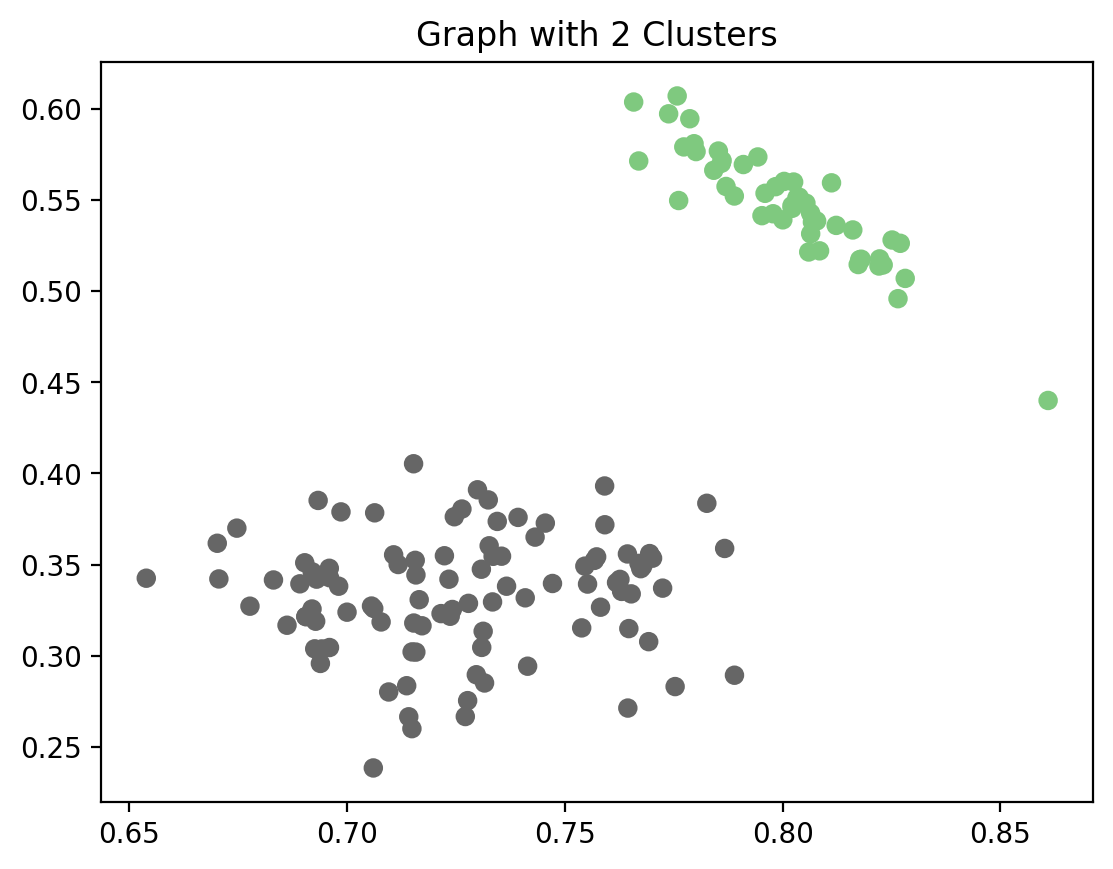

--Resut--
The best Custer graph is 2
has the best score of 0.8192435078999407


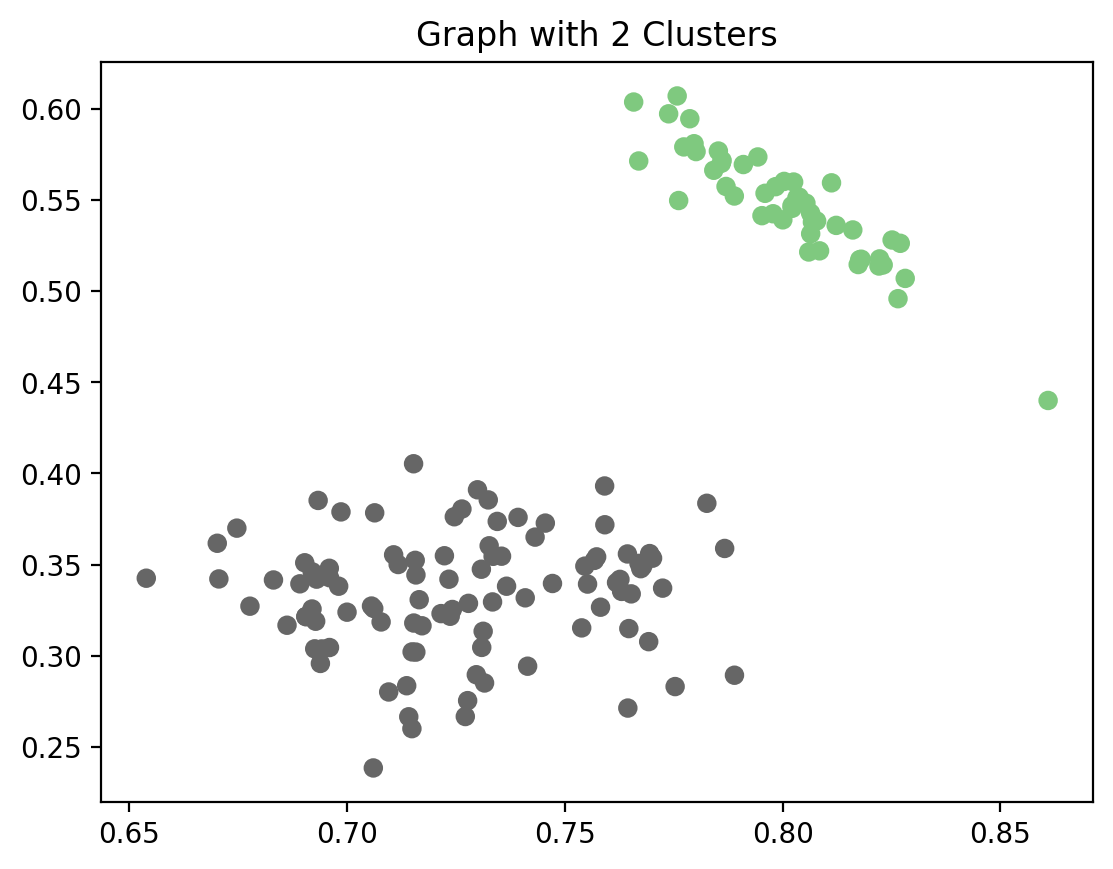

--Resut--
The best Custer graph is 2
has the best score of 0.8192435078999407


In [17]:
# Clustering with PCA
Score=0
BestScore=0
cluster=0
BestPC=0
#NumberClusters=0# doesn;t do anything 


for K in range (2,11):
#Create model object
    pca_classifer=PCA(n_components=4)
    pca_classifer=pca_classifer.fit(X_norm)
    pca_classifer=pca_classifer.transform(X_norm)
        
    km_classifer=KMeans(n_clusters=K)
        
    y_pred=km_classifer.fit(pca_classifer)
    y_pred=km_classifer.predict(pca_classifer)
#Train or fit the model
        #km_classifer.fit(X_norm)
    SilWidth=silhouette_score(pca_classifer,y_pred)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #km_classifer.fit(X_train,y_train)
#Predict cluster assignments
        #y_pred=km_classifer.predict(X_norm)
       
   
    #Calculate Silhouette width (see Problem 4)
       
    if(SilWidth>BestScore):
        BestScore = SilWidth
        cluster=K
        plt.scatter(X_norm[:,0], X_norm[:,1], c=y_pred, cmap=plt.cm.get_cmap('Accent'))
        #plt.title("Pl ")
        
        #plt.title("Graph with %i" % K +" Clusters") uncoment if you want more graphs
plt.title("Graph with %i" % cluster +" Clusters") 
plt.show()    
        #print(" The Silhouette score is,",SilWidth) uncoment if you want more graphs
        
#print(" The Silhouette score is,",SilWidth)        
    #Plot points color coded by class labels predicted by the model.
print("--Resut--")
print("The best Custer graph is",cluster)
print("has the best score of",BestScore)


**Discuss new results**(Edit this cell)
>In both problem 5 and 3, cluster 2 had the best score. The highest sscore was 0.879 and the lowest score was 0.296 and that had 9 clusters. So it reasons that more clusters gives a lower silhoette score and less clusters gives a higher score> Id din't find that PCA really helped with the dimentionaly, there are three categories and 4 labels.The PCA with 4 components didnt affect the score. 

when i did scaling my x range was -2 to 2 and when i normalized the x value started at 0 and ended with 0.8. Scaling, is focused on making sure the data points are centered aorund 0. There isn't going to be -2 flowers or a -2 length so scaling didn't really make sence. 
>



## You Finished! Treat yourself by taking this questionnaire
### Questionnaire
1) How long did you spend on this assignment?
a did it over the span of a couple days. I think like 6-7ish hours 
2) What did you like about it? What did you not like about it?
I thought some of the steps could be re-worded. 
3) Did you find any errors or is there anything you would like changed?
<br><br>


I think step 4 and 3 need to be re-ordered for the future. 